In [1]:
import pandas as pd

In [2]:
data1 = pd.read_csv("1apDashboardClientsDetails.csv",skiprows=1, index_col=False)
data2 = pd.read_csv("2apDashboardClientsDetails.csv",skiprows=1, index_col=False)
data = pd.concat([data1, data2])

In [3]:
data.head()

,Client,AP,Band,Date time,staName,alias,txBitrate,rxBitrate,ulthroughput,dlthroughput,channelFreq,txPower,txPer,txPfr,txPrr,signalStrength,time_axis,bssid,ssid
0,f4:a9:97:86:e6:f4,b8:ec:a3:2f:bd:fb,2.4,2019-03-06 00:00:01,NaN,NaN,72,68,32,8,2437,20,0,0,0,-31.0,1551848401277,b8:ec:a3:2f:bd:f8,APT_4536
1,f4:a9:97:86:e6:f4,b8:ec:a3:2f:bd:fb,2.4,2019-03-06 00:01:01,NaN,NaN,72,68,40,8,2437,20,0,0,0,-32.0,1551848461248,b8:ec:a3:2f:bd:f8,APT_4536
2,f4:a9:97:86:e6:f4,b8:ec:a3:2f:bd:fb,2.4,2019-03-06 00:02:01,NaN,NaN,72,68,56,24,2437,20,0,0,0,-31.0,1551848521282,b8:ec:a3:2f:bd:f8,APT_4536
3,f4:a9:97:86:e6:f4,b8:ec:a3:2f:bd:fb,2.4,2019-03-06 00:03:01,NaN,NaN,71,68,40,8,2437,20,0,0,0,-31.0,1551848581236,b8:ec:a3:2f:bd:f8,APT_4536
4,f4:a9:97:86:e6:f4,b8:ec:a3:2f:bd:fb,2.4,2019-03-06 00:04:01,NaN,NaN,69,69,32,8,2437,20,0,0,0,-31.0,1551848641301,b8:ec:a3:2f:bd:f8,APT_4536


In [9]:
#return distance 
import math
def calculateDistance(signalLevelInDb, freqInMHz):
    exp = (27.55 - (20 * math.log10(freqInMHz)) + math.fabs(signalLevelInDb)) / 20.0
    return math.pow(10.0, exp)

ValueError: Index contains duplicate entries, cannot reshape

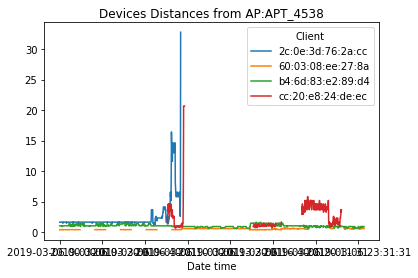

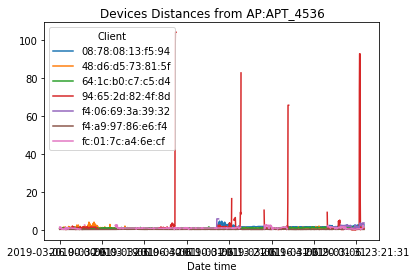

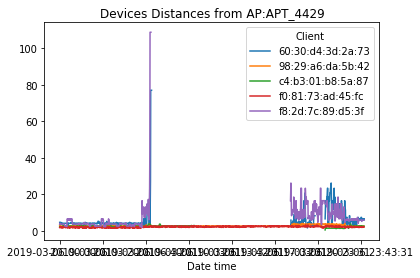

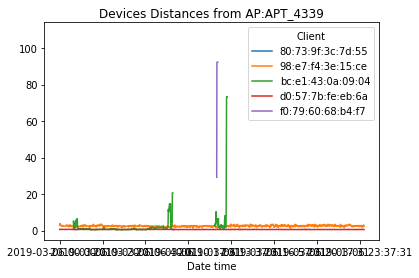

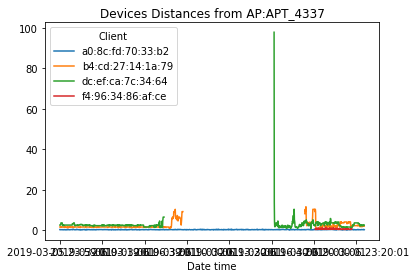

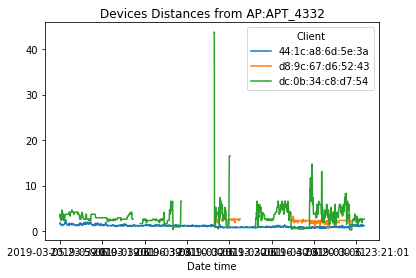

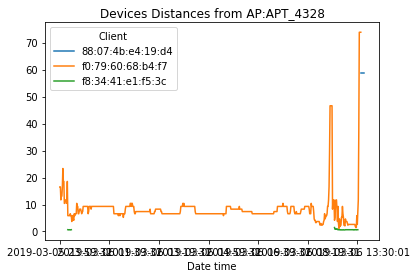

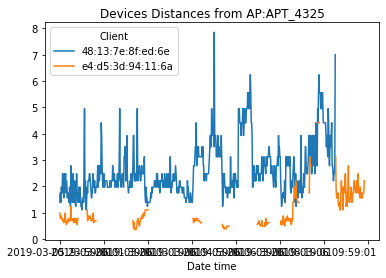

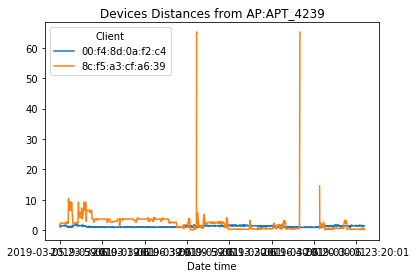

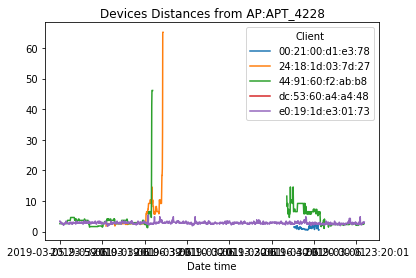

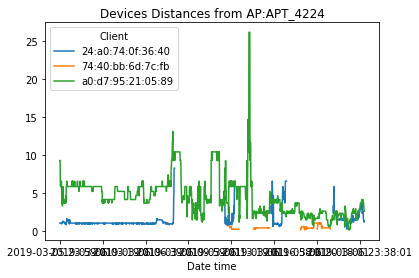

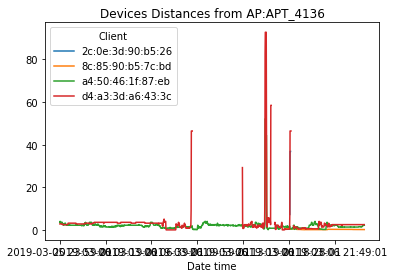

In [46]:
#group data by ssid(AP), Client(devices) order by date time. 
aps = data2['ssid'].unique()  

for ap in aps:
    dt = data1[data1.ssid==ap][['Client','Date time','channelFreq','signalStrength']]
    dt['distance'] = dt.apply(lambda row: calculateDistance(row.signalStrength, row.channelFreq), axis = 1)
    dp = dt[['Client','Date time','distance']]
    dp.sort_values(['Client','Date time'], ascending=True) 
    dp = dp.pivot(index='Date time', columns='Client', values='distance')
    dp.plot(title = 'Devices Distances from AP:'+ap)